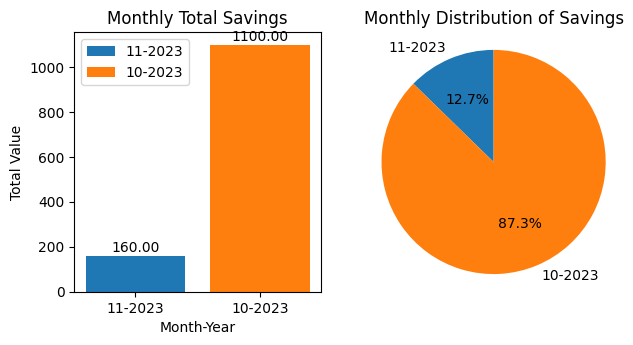

In [38]:
import tkinter as tk
from tkinter import ttk
from openpyxl import load_workbook, Workbook
from openpyxl.utils import get_column_letter
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import calendar

#save valor function
def save_valor():
    day_value = float(entry_value.get())
    values.append(day_value)
    all_value = sum(values)
    entry_value.delete(0,tk.END)

    label_status.config(text="value saved successfully",foreground = "green")
    label_total.config(text=f"total saved: R${all_value:.2f}")

    #adding value to a new spreadsheet row 
    line = len(values) + 1 
    date_column = get_column_letter(1)
    value_column = get_column_letter(2)
    sheet.cell(row=line,column=1,value = date.today().strftime("%Y-%m-%d"))
    sheet.cell(row=line,column=2,value = day_value)

def plot_graph():
    global canvas

    #get the dates and values
    dates = [cell.value.date() if isinstance(cell.value,datetime)else datetime.strptime(cell.value,"%Y-%m-%d").date() for cell in sheet ["A"][1:]]
    values = [cell.value for cell in sheet['B'][1:]]

    monthly_data = {}
    for data, value in zip(dates, values):
        month_year = data.strftime("%m-%Y")   
        if month_year in monthly_data:
           monthly_data[month_year].append(value) 
        else:
            monthly_data[month_year] = [value]

  # Restante do código da função ...

    # Criação do gráfico de barras
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 linha, 2 colunas

    for month_year, values in monthly_data.items():
        total_value = sum(values)
        ax1.bar(month_year, total_value, label=month_year)
        # Adiciona o valor acima da barra com uma distância vertical menor
        ax1.annotate(f'{total_value:.2f}', (month_year, total_value), textcoords="offset points", xytext=(0, 3), ha='center')

    ax1.set_xlabel('Month-Year')
    ax1.set_ylabel('Total Value')
    ax1.legend()
    ax1.set_title('Monthly Total Savings')  # Título do gráfico de barras

    # Criação do gráfico circular (pie chart)
    labels = list(monthly_data.keys())
    sizes = [sum(values) for values in monthly_data.values()]

    ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax2.axis('equal')  # Assegura que o gráfico de pizza é desenhado como um círculo.
    ax2.set_title('Monthly Distribution of Savings')  # Título do gráfico circular

    # Criação do widget do gráfico na interface gráfica
    canvas = FigureCanvasTkAgg(fig, master=window)
    canvas_widget = canvas.get_tk_widget()
    canvas_widget.pack()

    # Atualiza a interface gráfica
    window.update_idletasks()





window = tk.Tk()
window.title('Personal Savings App')
window.geometry("700x500")
window.configure(bg="#252525")


style = ttk.Style()
style.theme_use("clam")
style.configure("TLabel",background = "#252525", foreground ="#FFFFFF", font = ("Arial",12))
style.configure("TEntry", fieldbackground="#E0E0E0", foreground="#000000", font=("Arial", 12))
style.configure("TButton",background = "#4CAF50" , foreground ="#FFFFFF", font = ("Arial",12))


label_status = ttk.Label(window,text="",foreground="red")
label_total = ttk.Label(window,text="",font=("Arial",14,"bold"))
entry_value = ttk.Entry(window)

button_save = ttk.Button(window,text = "Save",command=save_valor)

#elements position
entry_value.pack(pady=10)
button_save.pack(pady=10)
label_status.pack()
label_total.pack(pady=10)


#spreadsheet loading

try:
    workbook = load_workbook("daily_values.xlsx")
except FileNotFoundError:
    workbook = Workbook()


#select first sheet

sheet = workbook.active


#checking if there are saved values

if sheet.max_row == 0:
    sheet.cell(row=1,column=1,value="Data")
    sheet.cell(row=1,column=2,value="daily value")

#getting the saved values
values = [cell.value for cell in sheet['B'][1:]]

#displays the total saved
label_total.config(text=f"displays the total saved: R${sum(values):.2f}")

plot_graph()

window.mainloop()


#save the spreadsheet with the updated values

workbook.save("daily_values.xlsx")